Initial Grid:


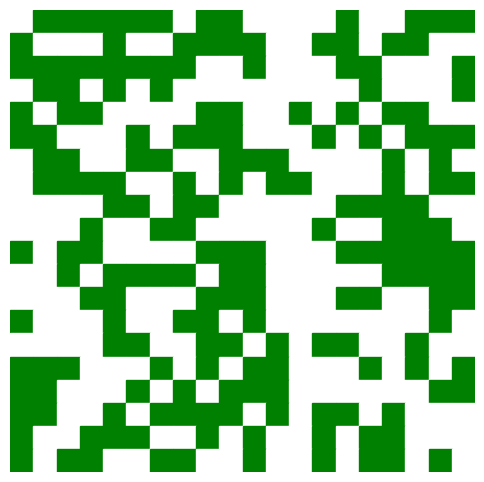

Final Grid after 20 iterations:


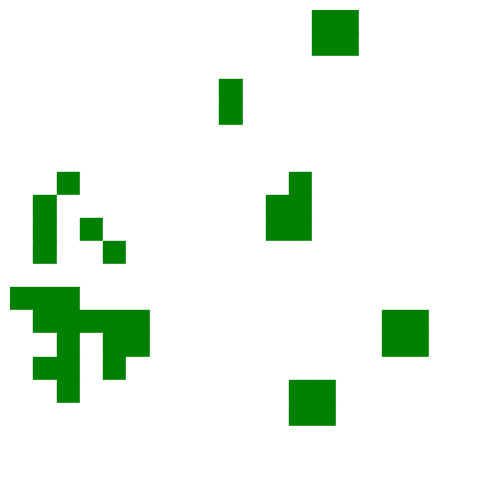

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

current_grid = [[random.randint(0, 1) for _ in range(20)] for _ in range(20)]
next_grid = [[0] * 20 for _ in range(20)]

offsets = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

def visualize_grid(grid):
    grid_array = np.array(grid)
    color_map = {0: 'white', 1: 'green'}
    
    fig, ax = plt.subplots(figsize=(6, 6))
    for row in range(20):
        for col in range(20):
            ax.add_patch(plt.Rectangle((col, 19 - row), 1, 1, color=color_map[grid[row][col]]))
    
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    plt.show()

def count_live_neighbors(grid, x, y):
    return sum(grid[x + dx][y + dy] for dx, dy in offsets if 0 <= x + dx < 20 and 0 <= y + dy < 20)

def update_grid():
    global current_grid, next_grid
    for row in range(20):
        for col in range(20):
            neighbors = count_live_neighbors(current_grid, row, col)
            if current_grid[row][col] == 1:
                next_grid[row][col] = 1 if neighbors in (2, 3) else 0
            else:
                next_grid[row][col] = 1 if neighbors == 3 else 0
    current_grid = [row[:] for row in next_grid]

print("Initial Grid:")
visualize_grid(current_grid)

for _ in range(20):
    update_grid()

print("Final Grid after 20 iterations:")
visualize_grid(current_grid)
